In [1]:
import numpy as np
import pandas as pd

In [ ]:
# Extract initial values
FX0 = init_values.loc["fx_spot"].values[0]
V0_US = init_values.loc["EQV US"].values[0]
V0_EUR = init_values.loc["EQV EUR"].values[0]
Z0_USD_5Y = np.exp(-init_values.loc["5Y USD"].values[0] * 5)
Z0_EUR_5Y = np.exp(-init_values.loc["5Y EUR"].values[0] * 5)


In [ ]:
# Load initial values and covariance matrix
init_values = pd.read_excel("init_values.xlsx", index_col=0)
cov_matrix = pd.read_excel("covariance_matrix.xlsx", index_col=0)

# Extract initial values
FX0 = init_values.loc["fx_spot"].values[0]
V0_US = init_values.loc["EQV US"].values[0]
V0_EUR = init_values.loc["EQV EUR"].values[0]
Z0_USD_5Y = np.exp(-init_values.loc["5Y USD"].values[0] * 5)
Z0_EUR_5Y = np.exp(-init_values.loc["5Y EUR"].values[0] * 5)

# Covariance matrix (unchanged)
Sigma_PnL = cov_matrix.values
num_assets = Sigma_PnL.shape[0]

# Updated mean vector mu
delta_t = 1 / 52
mu = np.zeros(num_assets)  # Assume zero drift for simplicity

# Expectation of PnL vector
E_PnL = mu  # Use the updated mean vector

# Covariance matrix of the portfolio
Var_PnL = Sigma_PnL

# Jacobian matrix (derivative of PnL with respect to changes in invariants)
J = np.zeros((5, len(cov_matrix)))

# FX forward
J[0, 0] = -1 / FX0**2

# EQV US and EUR
J[1, 1] = 1  # Change in V_US
J[2, 2] = 1  # Change in V_EUR

# USD and EUR zero-coupon bonds
J[3, 9] = -4 * Z0_USD_5Y  # Change in 4Y USD yield
J[4, 3] = -4 * Z0_EUR_5Y  # Change in 4Y EUR yield

# Calculate expectation and covariance matrix of PnL vector
E_PnL = J @ mu  # Expectation
Cov_PnL = J @ sigma @ J.T  # Covariance matrix

# Display results
print("Expectation of PnL vector:\n", E_PnL)
print("\nCovariance matrix of PnL vector:\n", Cov_PnL)


NameError: name 'sigma' is not defined

In [ ]:
# Define holding vector with correct dimensions
h = np.ones(len(cov_matrix))  # Adjust size to match the covariance matrix

# Extract covariance matrix
Sigma_PnL = cov_matrix.values  # Convert to numpy array

# Expectation of PnL vector (assume zero drift)
E_PnL = np.zeros(len(cov_matrix))

# Portfolio PnL expectation
E_portfolio_PnL = h.T @ E_PnL

# Portfolio PnL variance
Var_portfolio_PnL = h.T @ Sigma_PnL @ h

# Standard deviation (risk) of portfolio PnL
Std_portfolio_PnL = np.sqrt(Var_portfolio_PnL)

# Print the results
print("Expectation of Portfolio PnL:", E_portfolio_PnL)
print("Variance of Portfolio PnL:", Var_portfolio_PnL)
print("Standard Deviation (Risk) of Portfolio PnL:", Std_portfolio_PnL)


Expectation of Portfolio PnL: 0.0
Variance of Portfolio PnL: 0.001791753967759466
Standard Deviation (Risk) of Portfolio PnL: 0.04232911489459077


In [26]:
# Define the updated mean vector
delta_t = 1 / 52  # Weekly time step
mu = np.array([0, 0.07 * delta_t, 0.06 * delta_t] + [0] * (Sigma_PnL.shape[0] - 3))

# Define the holding vector
h = np.ones(len(mu))  # Example: equally weighted portfolio

# Portfolio PnL expectation
E_portfolio_PnL = h.T @ mu

# Portfolio PnL variance
Var_portfolio_PnL = h.T @ Sigma_PnL @ h

# Standard deviation (risk) of portfolio PnL
Std_portfolio_PnL = np.sqrt(Var_portfolio_PnL)

# Print results
print("Expectation of Portfolio PnL:", E_portfolio_PnL)
print("Variance of Portfolio PnL:", Var_portfolio_PnL)
print("Standard Deviation (Risk) of Portfolio PnL:", Std_portfolio_PnL)


Expectation of Portfolio PnL: 0.0025000000000000005
Variance of Portfolio PnL: 0.001791753967759466
Standard Deviation (Risk) of Portfolio PnL: 0.04232911489459077


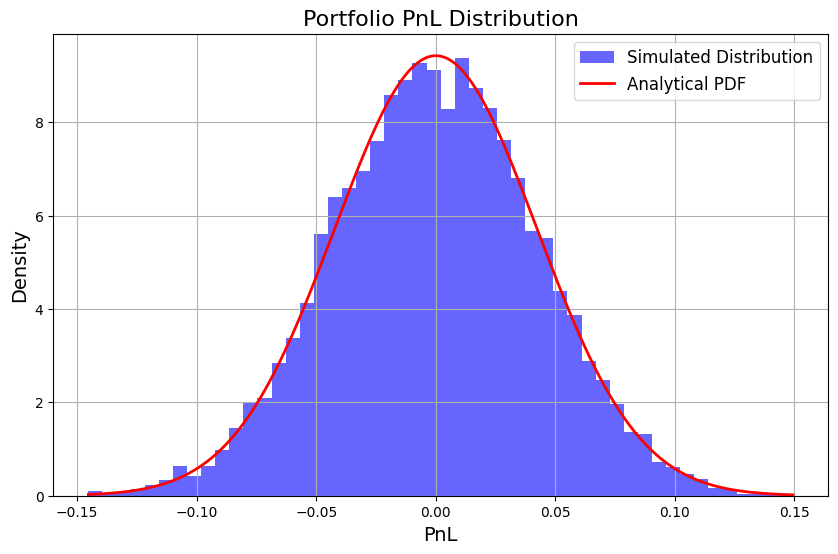

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulate Portfolio PnL
n_simulations = 10000  # Number of simulations
portfolio_PnL_simulated = np.random.normal(E_portfolio_PnL, Std_portfolio_PnL, n_simulations)

# Plot histogram and theoretical distribution
plt.figure(figsize=(10, 6))
plt.hist(portfolio_PnL_simulated, bins=50, density=True, alpha=0.6, color='blue', label='Simulated Distribution')

# Add theoretical normal PDF
x = np.linspace(min(portfolio_PnL_simulated), max(portfolio_PnL_simulated), 1000)
pdf = norm.pdf(x, E_portfolio_PnL, Std_portfolio_PnL)
plt.plot(x, pdf, color='red', linewidth=2, label='Analytical PDF')

# Add titles and labels
plt.title("Portfolio PnL Distribution", fontsize=16)
plt.xlabel("PnL", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

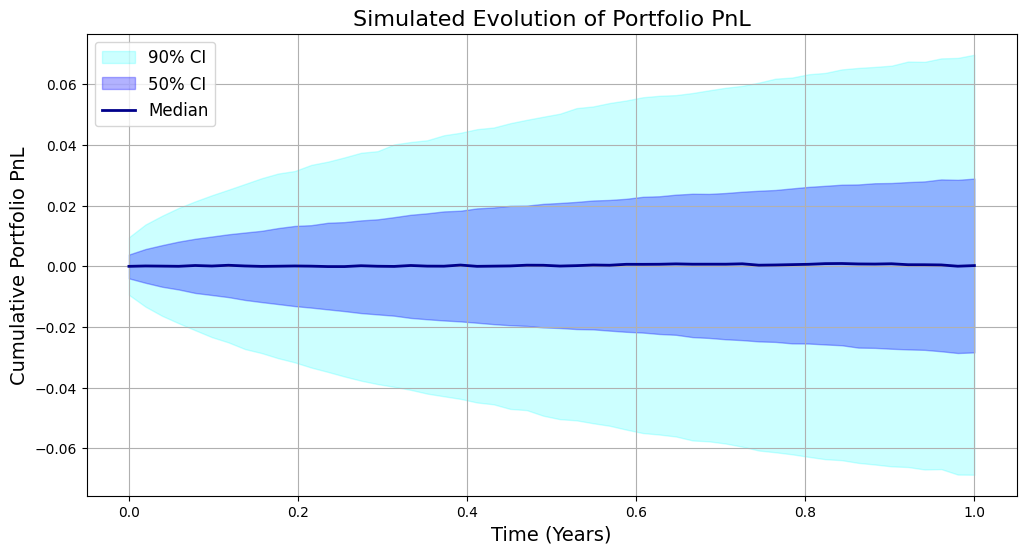

In [19]:
# Define parameters
num_assets = len(cov_matrix)  # Number of PnL components
h = np.ones(num_assets)  # Example holding vector (adjust as needed)
num_periods = 52  # Weekly time steps for one year
time_step = 1 / 52  # Length of one time step in years
num_sim = 10000  # Number of simulations

# Initialize PnL expectation and covariance matrix
E_PnL = np.zeros(num_assets)  # Zero drift assumption
Sigma_PnL_scaled = Sigma_PnL * time_step  # Adjust covariance for weekly steps

# Simulate PnL changes over time
sim_changes = np.random.multivariate_normal(E_PnL, Sigma_PnL_scaled, size=(num_sim, num_periods))
sim_portfolio_PnL = np.cumsum(sim_changes @ h, axis=1)  # Cumulative portfolio PnL over time

# Create time points for plotting
time_points = np.linspace(0, 1, num_periods)

# Calculate percentiles for fan chart
percentiles = np.percentile(sim_portfolio_PnL, [0.5, 5, 25, 50, 75, 95, 99.5], axis=0)

# Plot the fan chart
plt.figure(figsize=(12, 6))
plt.fill_between(time_points, percentiles[1], percentiles[5], color='cyan', alpha=0.2, label='90% CI')
plt.fill_between(time_points, percentiles[2], percentiles[4], color='blue', alpha=0.3, label='50% CI')
plt.plot(time_points, percentiles[3], color='darkblue', label='Median', linewidth=2)
plt.title("Simulated Evolution of Portfolio PnL", fontsize=16)
plt.xlabel("Time (Years)", fontsize=14)
plt.ylabel("Cumulative Portfolio PnL", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
